#Implementación de un modelo de deep learning.

Cristian Rogelio Espinosa Díaz A01702752



# Importamos las librerías necesarias para el funcionamiento del código.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers


# Procesamiento de datos

Nuestro conjunto de datos ya se encontraba previamente dividido en tres carpetas, destinadas a las etapas de entrenamiento (train), prueba (test) y validación (validation).

Por lo tanto, simplemente estableceremos las rutas de acceso a las carpetas correspondientes a cada una de estas fases.

In [ ]:
train_path = 'train'
validation_path = 'validation'
test_path = 'test'

El conjunto de datos comprende una variedad de vegetales que se distribuyen en 6 clases o tipos diferentes:

* Bean
* Broccoli
* Cabbage
* Carrot
* Pumpkin
* Tomato

Dado este contexto, se ha optado por implementar un modelo categórico. Esto permite clasificar y agrupar los datos en función de sus características particulares. Para el proceso de entrenamiento, se tomó como base el modelo VGG16.

VGG16 es una arquitectura de red neuronal convolucional (CNN) que ha sido ampliamente utilizada en el campo de la visión por computadora y el aprendizaje profundo. Fue desarrollada por el grupo Visual Geometry Group (VGG) en la Universidad de Oxford y es conocida por su profundidad y su capacidad para aprender representaciones de características de imágenes.

La arquitectura VGG16 se caracteriza por tener 16 capas de pesos, incluyendo 13 capas convolucionales y 3 capas completamente conectadas. Utiliza convoluciones 3x3 con un paso y un relleno (padding) de 1, y max-pooling 2x2 para reducir la dimensionalidad espacial. VGG16 se ha utilizado principalmente para tareas de clasificación de imágenes, como el reconocimiento de objetos en imágenes y la identificación de categorías.


In [ ]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.2,
							zoom_range = 0.2,
							horizontal_flip = True,)

train_generator = train_datagen.flow_from_directory(
							train_path,
							target_size = (150, 150),
							batch_size = 20,
							class_mode ='categorical')

val_datagen = ImageDataGenerator(1./255)

val_generator = val_datagen.flow_from_directory(
							validation_path,
							target_size = (150,150),
							batch_size =20,
							class_mode= 'categorical')

test_datagen = ImageDataGenerator(1./255)

test_generator = test_datagen.flow_from_directory(
							test_path,
							target_size = (150, 150),
							batch_size = 20,
							class_mode= 'categorical')

conv_base= VGG16(weights='imagenet',
							include_top = False,
							input_shape = (150,150,3))

Found 6000 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


# Primer Modelo

Para esta iteración, hemos implementado un modelo secuencial que se basa en la arquitectura VGG16, la cual hemos utilizado previamente en nuestro proceso de desarrollo. La razón detrás de esta elección es que deseamos mantener los pesos pre-entrenados de VGG16 inalterados, por lo que hemos establecido el parámetro trainable en "False".

Una vez que hemos configurado la base de VGG16, continuamos construyendo nuestro modelo añadiendo capas adicionales. Primero, hemos aplicado una capa de aplanamiento (Flatten) para convertir los datos en un formato adecuado para la clasificación. Luego, hemos incorporado dos capas densas: una con 256 unidades y función de activación ReLU, seguida de otra capa con 6 unidades y función de activación softmax, que se adapta a nuestras seis clases de salida.

In [ ]:
model1 = models.Sequential()
model1.add(conv_base)
model1.add(layers.Flatten())
model1.add(layers.Dense(256,activation='relu'))
model1.add(layers.Dense(6,activation='softmax'))

conv_base.trainable = False

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 16813638 (64.14 MB)
Trainable params: 2098950 (8.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Al compilar nuestro modelo, hemos seleccionado el optimizador RMSprop como la función encargada de ajustar los pesos durante el proceso de entrenamiento. Este optimizador utiliza una tasa de aprendizaje de 0.00002.

El algoritmo RMSprop es conocido por su capacidad para adaptar la tasa de aprendizaje de manera dinámica durante el entrenamiento. Funciona calculando un promedio móvil ponderado de los cuadrados de los gradientes anteriores y luego divide el gradiente actual por la raíz cuadrada de este promedio. Esto ayuda a controlar la velocidad de convergencia y a evitar problemas como la convergencia prematura o la ralentización del entrenamiento.

En cuanto a la función de pérdida, hemos elegido utilizar la entropía cruzada categórica (categorical_crossentropy). Esta elección es apropiada ya que estamos tratando con un problema de clasificación en el que las muestras pertenecen a diferentes clases. La entropía cruzada categórica es una métrica comúnmente utilizada en este contexto.

Finalmente, hemos definido la métrica de aprendizaje como "accuracy", lo que significa que evaluaremos el rendimiento del modelo en función de su capacidad para predecir correctamente las clases de las muestras de prueba.

In [ ]:
model1.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])

En el proceso de entrenamiento de nuestro modelo, hemos realizado configuraciones específicas. Durante cada época (epoch), que son iteraciones completas a través de nuestro conjunto de entrenamiento, se han establecido 30 pasos (steps) para procesar los lotes de datos de entrenamiento. En total, hemos ejecutado 15 épocas para entrenar el modelo.

Además, hemos dedicado atención a la validación del modelo. Para ello, hemos establecido 25 pasos para procesar los lotes de datos de validación en cada época.

Estas configuraciones aseguran que tanto el entrenamiento como la validación se realicen de manera exhaustiva y controlada.

In [ ]:
history = model1.fit(train_generator,
				steps_per_epoch = 30,
				epochs = 15,
				validation_data = val_generator,
				validation_steps = 25)

Epoch 1/15
30/30 [==============================] - ETA: 0s - loss: 1.7014 - acc: 0.2950

c:\Users\cris_\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


30/30 [==============================] - 64s 2s/step - loss: 1.7014 - acc: 0.2950 - val_loss: 15.1655 - val_acc: 0.2220
Epoch 2/15
30/30 [==============================] - 59s 2s/step - loss: 1.3549 - acc: 0.5617 - val_loss: 10.5002 - val_acc: 0.3800
Epoch 3/15
30/30 [==============================] - 61s 2s/step - loss: 1.1506 - acc: 0.6967 - val_loss: 7.8386 - val_acc: 0.4980
Epoch 4/15
30/30 [==============================] - 60s 2s/step - loss: 0.9652 - acc: 0.7850 - val_loss: 6.5927 - val_acc: 0.5920
Epoch 5/15
30/30 [==============================] - 57s 2s/step - loss: 0.8457 - acc: 0.8283 - val_loss: 6.0002 - val_acc: 0.6600
Epoch 6/15
30/30 [==============================] - 60s 2s/step - loss: 0.7628 - acc: 0.8467 - val_loss: 4.6670 - val_acc: 0.7280
Epoch 7/15
30/30 [==============================] - 58s 2s/step - loss: 0.6523 - acc: 0.8517 - val_loss: 4.2135 - val_acc: 0.7480
Epoch 8/15
30/30 [==============================] - 56s 2s/step - loss: 0.6129 - acc: 0.8600 - val_

Resultados del primer modelo

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(train_acc)+1)

Graficamos los resultados

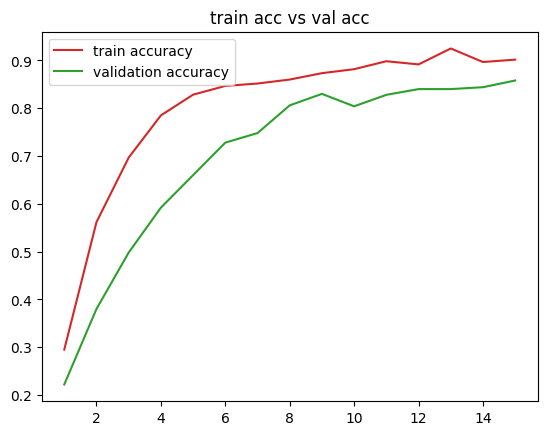

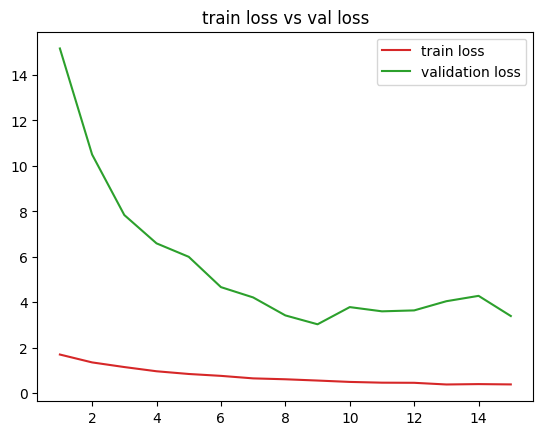

In [ ]:
plt.plot(epochs,train_acc,'tab:red',label='train accuracy')
plt.plot(epochs,val_acc, 'tab:green', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,train_loss, 'tab:red', label ='train loss')
plt.plot(epochs,val_loss, 'tab:green', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model1.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)

25/25 [==============================] - 27s 1s/step - loss: 3.7293 - acc: 0.8500

test acc :
 0.8500000238418579


De los gráficos, podemos observar que el modelo está aprendiendo de manera constante y a un ritmo adecuado.

Sin embargo, al analizar los valores de accuracy para los conjuntos de validation y train, notamos que el accuracy en el conjunto de validation (85.80%) es inferior al del conjunto de train (90.17%).

Esta diferencia entre los valores de accuracy es de 4.37%, lo cual está por debajo del umbral del 10%. Este hallazgo sugiere que el modelo podría no estar experimentando overfitting, es decir, no se está ajustando en exceso a los datos de train. Un alto grado de overfitting puede dar como resultado un rendimiento deficiente del modelo cuando se enfrenta a nuevos datos, como los del conjunto de validation.

A su vez, test obtuvo un accuracy de 85%, similar al de validation. Lo cual puede corroborar nuestra hipótesis de que el modelo posee buen ajuste.


# Segundo Modelo, en búsqueda de mejoras.

Los valores de accuracy se encuentran en un rango de rendimiento razonable, oscilando entre el 80% y el 90%. Esta variación indica que el modelo está realizando predicciones correctas en la mayoría de las situaciones.

En consecuencia, la opción más viable es que mediante un sencillo ajuste de hiper parámetros se pueda mejorar aún más el accuracy e intentar disminuir la diferencia entre las accuracies de train y validation.

La primera diferencia en este modelo será la implementación de la técnica de regularización L2.

La técnica de regularización L2, en el contexto de red neuronal, se utiliza para mitigar el riesgo de overfitting. El overfitting ocurre cuando el modelo se ajusta en exceso a los datos de entrenamiento y, como resultado, no generaliza bien a nuevos datos.

Se aplica la regularización L2 a la capa densa con 256 unidades (neuronas) y función de activación ReLU. La regularización L2 funciona al agregar un término a la función de pérdida del modelo que penaliza los valores grandes de los pesos (coeficientes) en la capa. 

El valor 0.01 que se pasa a “regularizers.l2”, es el parámetro de regularización que controla la fuerza de la penalización. Un valor más alto de este parámetro aumentaría la penalización sobre los pesos, lo que resultaría en una regularización más fuerte.

La regularización L2 tiene el efecto de forzar a los pesos de la capa a ser pequeños, lo que, a su vez, limita la capacidad de la capa para aprender patrones complejos de los datos de entrenamiento. Esto puede ayudar a prevenir el overfitting al hacer que el modelo sea más generalizado y menos propenso a ajustarse en exceso a los datos de entrenamiento.



In [ ]:
from keras import regularizers

model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())

# Add a Dense layer with L2 regularization
model2.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model2.add(layers.Dense(6, activation='softmax'))

# Set the convolutional base to non-trainable
conv_base.trainable = False

Para esta compilación de nuestro modelo, seguiremos usando el optimizador RMSprop como la función encargada de ajustar los pesos durante el proceso de entrenamiento. Con la diferencia de ajustar la tasa de aprendizaje a 0.00025.

A su vez, se mantiene la implementación de entropía cruzada categórica y la métrica de aprendizaje "accuracy".

In [ ]:
model2.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=25e-5),
						metrics=['acc'])

Otra diferencia con el primer modelo será el aumento de steps y de épocas. Steps aumentará de 30 a 60 y las épocas de 15 a 50. Para los steps de validación pasaron de 25 a 60.

In [ ]:
history = model2.fit(train_generator,
				steps_per_epoch = 60,
				epochs = 50,
				validation_data = val_generator,
				validation_steps = 60)

Epoch 1/50
60/60 [==============================] - 126s 2s/step - loss: 4.5023 - acc: 0.6808 - val_loss: 4.8594 - val_acc: 0.8833
Epoch 2/50
60/60 [==============================] - 129s 2s/step - loss: 2.3239 - acc: 0.8658 - val_loss: 5.0745 - val_acc: 0.8667
Epoch 3/50
60/60 [==============================] - 128s 2s/step - loss: 1.5202 - acc: 0.9033 - val_loss: 3.7440 - val_acc: 0.9100
Epoch 4/50
60/60 [==============================] - 137s 2s/step - loss: 1.1521 - acc: 0.9267 - val_loss: 3.9596 - val_acc: 0.8933
Epoch 5/50
60/60 [==============================] - 126s 2s/step - loss: 0.9191 - acc: 0.9467 - val_loss: 4.0019 - val_acc: 0.9008
Epoch 6/50
60/60 [==============================] - 123s 2s/step - loss: 0.7764 - acc: 0.9458 - val_loss: 5.4577 - val_acc: 0.8650
Epoch 7/50
60/60 [==============================] - 123s 2s/step - loss: 0.7017 - acc: 0.9383 - val_loss: 5.3783 - val_acc: 0.8750
Epoch 8/50
60/60 [==============================] - 122s 2s/step - loss: 0.6115 - a

Resultados del segundo modelo

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(train_acc)+1)

Graficamos los resultados

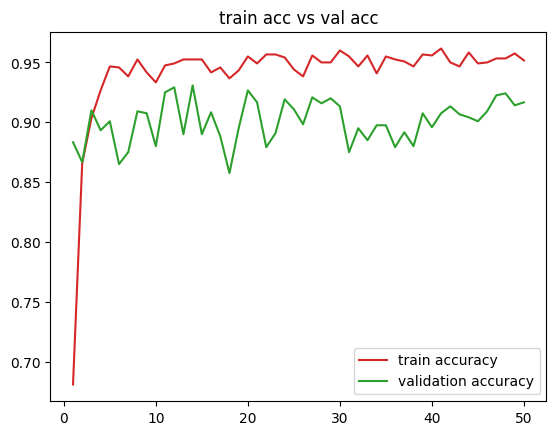

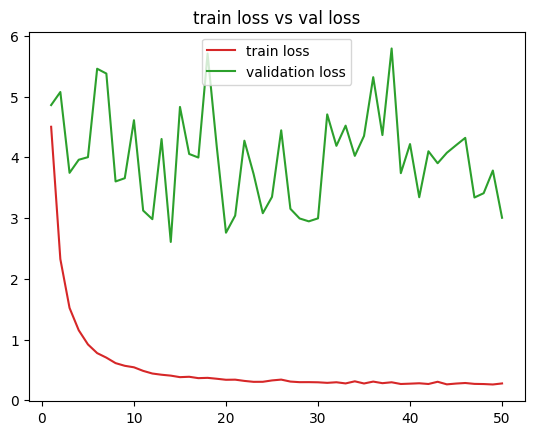

In [ ]:
plt.plot(epochs,train_acc,'tab:red',label='train accuracy')
plt.plot(epochs,val_acc, 'tab:green', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,train_loss, 'tab:red', label ='train loss')
plt.plot(epochs,val_loss, 'tab:green', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model2.evaluate(test_generator, steps = 60)
print('\ntest acc :\n', test_acc)

60/60 [==============================] - 61s 1s/step - loss: 3.0855 - acc: 0.9217

test acc :
 0.92166668176651


A primera vista, los gráficos pueden generar cierta confusión, ya que muestran un patrón diferente al del primer modelo. Este nuevo patrón, caracterizado por movimientos más abruptos, podría llevar a la errónea impresión de que el modelo ha empeorado.

Esta declaración es errónea, debido a que en los datos impresos, vemos una mejora en el valor de la accuracy de train pasó de 90.17% a 95.17% y la accuracy de validation pasó de 85.80% a 91.67%.

La diferencia de las accuracy pasó de 4.37% a 3.5%. Esto nos indica que este segundo modelo mantiene un buen ajuste al mantener la diferencia de las accuracies por debajo del umbral del 10%.

A su vez, test incrementó de 85% a 92.16%. Esto nos ayuda nuevamente a verificar que el modelo posee buen rendimiento y buen ajuste.

Guardamos el modelo tanto en formato .keras y .h5.

In [ ]:
model2.save('Vegetable_Classification.h5')

c:\Users\cris_\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2.save('Vegetable_Classification.keras')